## Import necessary library

In [1]:
import pandas as pd
import numpy as np

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Load dataset

In [ ]:
df = pd.read_csv("../assets/BankChurners.csv", sep=",")
df.head()

## Data Cleaning

In [3]:
#clean the data based on a copy of original dataset
df1=df.copy()

In [4]:
# Drop last two columns which are irrelevant
df1.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True )

In [5]:
#drop the CLIENTNUM column
df1 = df1.iloc[:,1:]

In [6]:
#drop some columns which doesn't make big difference from data exploration in v1
df1.drop(columns=['Dependent_count','Education_Level', 'Card_Category'],axis=1, inplace=True)


## Check correlation heatmap

In [7]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

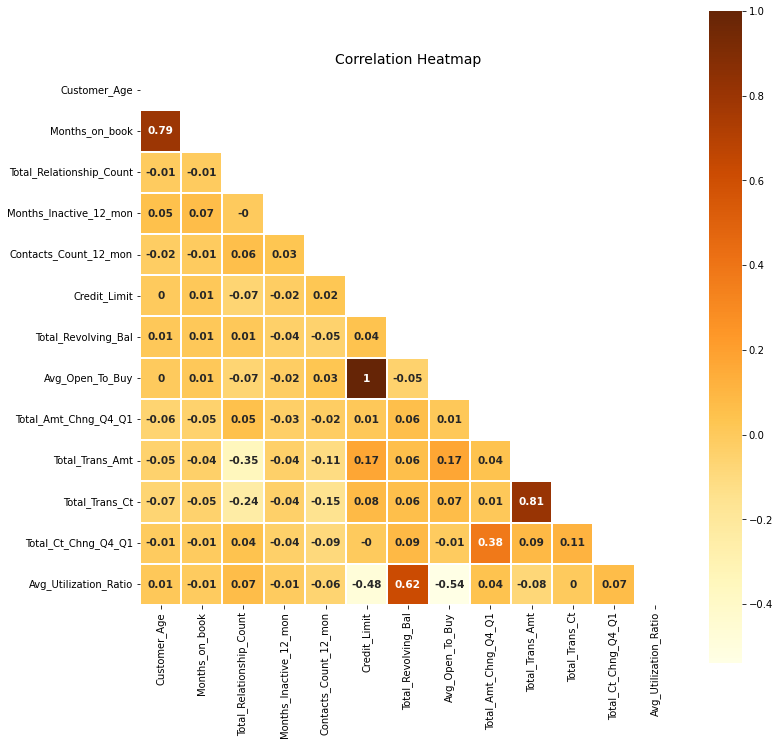

In [8]:
var_corr = round(df1.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

comments:

Here we can see that some feature are highly correlated, such as:

Avg_Open_To_Buy and Credit_Limit, (1)

Total_Trans_Ct and Total_Trans_Amt, (0.81)

Months_on_book and Customer_Age, (0.79)

In [ ]:
# drop highly correlated feature
df1.drop(columns=['Avg_Open_To_Buy','Total_Trans_Amt', 'Months_on_book'],axis=1, inplace=True)

# updated DataFrame
df1.info()

In [10]:
target_col = 'Attrition_Flag'

cat_cols = ["Gender","Marital_Status","Income_Category","Contacts_Count_12_mon"]

num_cols = ["Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
         "Customer_Age","Credit_Limit","Total_Revolving_Bal","Total_Amt_Chng_Q4_Q1",
         "Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]

In [11]:
# Mean summary of customers (Churn vs Non churn)
print(df1.groupby('Attrition_Flag')[num_cols].mean())

                   Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag                                                        
Attrited Customer                  3.279656                2.693301   
Existing Customer                  3.914588                2.273765   

                   Contacts_Count_12_mon  Customer_Age  Credit_Limit  \
Attrition_Flag                                                         
Attrited Customer               2.972342     46.659496   8136.039459   
Existing Customer               2.356353     46.262118   8726.877518   

                   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
Attrition_Flag                                                                 
Attrited Customer           672.822987              0.694277       44.933620   
Existing Customer          1256.604118              0.772510       68.672588   

                   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
Attrition_Flag                           

Churn customer has the following character:

1. less "Total_Revolving_Bal"
2. less Total_Trans_Ct 
4. lower utilization rate

In [12]:
#drop Customer Age as there is no big difference in churn and existing customers based on v1 data exploration
#drop 'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1', as this information is too much to process and becomes meaningless
df1=df1.drop(columns=['Customer_Age','Marital_Status','Income_Category','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count','Months_Inactive_12_mon','Total_Trans_Ct'] )

In [13]:
df1.head()

,Attrition_Flag,Gender,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Utilization_Ratio
0,Existing Customer,M,3,12691.0,777,0.061
1,Existing Customer,F,2,8256.0,864,0.105
2,Existing Customer,M,0,3418.0,0,0.000
3,Existing Customer,F,1,3313.0,2517,0.760
4,Existing Customer,M,0,4716.0,0,0.000


In [14]:
df1.to_csv("../assets/clean_data.csv",index=False)